In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Step 2: Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chiragdua/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Step 3: Load Dataset
news_dataset = pd.read_csv('train 4.csv')  
news_dataset = news_dataset.fillna('')

In [5]:
# Step 4: Merge 'author' and 'title' into a new 'content' column
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [6]:
# Step 5: Text Preprocessing
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)  # Keep only letters
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    return ' '.join(stemmed_content)

news_dataset['content'] = news_dataset['content'].apply(stemming)

In [7]:
# Step 6: Define Features and Labels
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [8]:
# Step 8: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [10]:
# Step 9: Model Training - Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform both training and test data
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit on train data and transform
X_test_tfidf = vectorizer.transform(X_test)  # Only transform the test data

# Initialize the PassiveAggressiveClassifier model
model = PassiveAggressiveClassifier(max_iter=1000)

# Train the model using the transformed features
model.fit(X_train_tfidf, Y_train)

PassiveAggressiveClassifier()

In [11]:
# Step 10: Accuracy Scores
train_pred = model.predict(X_train_tfidf)
train_accuracy = accuracy_score(Y_train, train_pred)
print("Training Accuracy:", train_accuracy)

test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9918269230769231


In [12]:
# Step 11: Cross Validation Score
cv_scores = cross_val_score(model, vectorizer.transform(X), Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.99447115 0.99230769 0.99399038 0.99350962 0.99110577]
Mean Cross-Validation Accuracy: 0.9930769230769231



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160

Confusion Matrix:


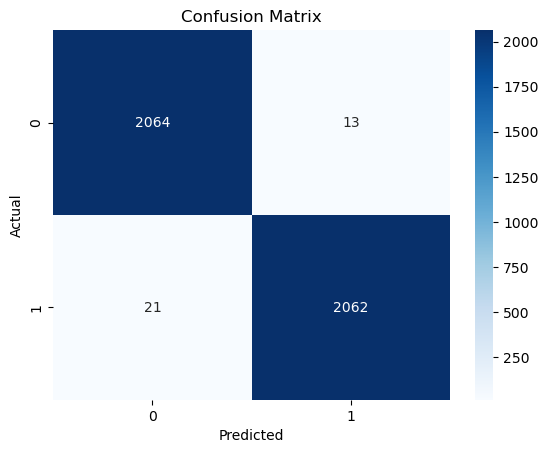

In [13]:
# Step 12: Evaluation Metrics
print("\nClassification Report:")
print(classification_report(Y_test, test_pred))

print("Confusion Matrix:")
cm = confusion_matrix(Y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Step 13: Predicting a Single Example
X_new = X_test[3]
X_new_tfidf = vectorizer.transform([X_new])  # Transform single sample
prediction = model.predict(X_new_tfidf)

print("\nSample Prediction:")
print("Predicted Label:", "Fake" if prediction[0] == 1 else "Real")


Sample Prediction:
Predicted Label: Real
